### Student Information
Name:Dongil (Jeff) Jang

Student ID:108065429

GitHub ID:justdoit0430

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [1]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
#import plotly as py
import math
import matplotlib.pyplot as plt #추가
import os
import glob
import helpers.data_mining_helpers as dmh

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#importing each txt files and see they are all in same format in order to be combined into one.
#At this stage, I was thinking that making a new category column for each 
amazon=pd.read_csv("./amazon.txt",header=None, sep='\t')
imdb=pd.read_csv("./imdb.txt",header=None, sep='\t')
yelp=pd.read_csv("./yelp.txt",header=None, sep='\t')
#Import files, spliting the column into two : Review sentences and Binary number(1 or 0)

# Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? 

Since the dataset for this homework is relatively more simple than the news 20 dataset of the lab class, I tried to use Pandas function from the beginning to start with datas in form of the dataframes. 

However, for this time, the different thing is that I had to import datas from the files and they 3 files altogether. Thus, combining them into one dataframe would be necessary.

I was trying many ways to get those tasks done in the most efficient way, and the items below are the way I tried to make it efficient. The point is that : I would like to make it by keeping the original resource name of each reviews, so that we information users would notice that this review is from like imdb, amazon, or yelp. Also I thought I should keep this information in order to deal with the datas in the future.

In [4]:
imdb.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [5]:
imdb.columns = ['Review','Score'] #Change the column name from 0,1 to Review and Score
imdb['Category'] = "imdb" #add a column, because we never know which product a review is for after combining.
amazon.columns = ['Review','Score']
amazon['Category'] = "amazon"
yelp.columns = ['Review','Score']
yelp['Category'] = "yelp"


In [6]:
imdb.head()

,Review,Score,Category
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb


In [7]:
imdb.head()

,Review,Score,Category
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb


In [8]:
amazon.head()

,Review,Score,Category
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon


In [9]:
combined = pd.concat([imdb, amazon, yelp])
#pd.merge(imdb,amazon,yelp,on="review1") - not using this

In [10]:
combined

,Review,Score,Category
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb
5,"The rest of the movie lacks art, charm, meanin...",0,imdb
6,Wasted two hours.,0,imdb
7,Saw the movie today and thought it was a good ...,1,imdb
8,A bit predictable.,0,imdb
9,Loved the casting of Jimmy Buffet as the scien...,1,imdb


In [11]:
df = combined[combined["Review"].notnull()] #To elimiate all the null data


In [12]:
df=pd.DataFrame(df)

In [13]:
df

,Review,Score,Category
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb
5,"The rest of the movie lacks art, charm, meanin...",0,imdb
6,Wasted two hours.,0,imdb
7,Saw the movie today and thought it was a good ...,1,imdb
8,A bit predictable.,0,imdb
9,Loved the casting of Jimmy Buffet as the scien...,1,imdb


In [14]:
df.head()

,Review,Score,Category
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb


In [15]:
len(df)

2748

In [16]:
df[-10:]

,Review,Score,Category
990,The refried beans that came with my meal were ...,0,yelp
991,Spend your money and time some place else.,0,yelp
992,A lady at the table next to us found a live gr...,0,yelp
993,the presentation of the food was awful.,0,yelp
994,I can't tell you how disappointed I was.,0,yelp
995,I think food should have flavor and texture an...,0,yelp
996,Appetite instantly gone.,0,yelp
997,Overall I was not impressed and would not go b...,0,yelp
998,"The whole experience was underwhelming, and I ...",0,yelp
999,"Then, as if I hadn't wasted enough of my life ...",0,yelp


In [17]:
# using loc (by position)
df.iloc[::10, 0:3][0:10]

,Review,Score,Category
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
10,And those baby owls were adorable.,1,imdb
20,This if the first movie I've given a 10 to in ...,1,imdb
30,The problem was the script.,0,imdb
40,"Frankly, after Cotton club and Unfaithful, it ...",0,imdb
50,The directing and the cinematography aren't qu...,0,imdb
60,The movie had you on the edge of your seat and...,1,imdb
70,There were several moments in the movie that j...,0,imdb
80,All the pretty pictures in the world cannot ma...,0,imdb
90,"Also, it's a real treat to see Anthony Quinn p...",1,imdb


In [18]:
# using loc (by label)
df.loc[::10, 'Review'][0:10]

0     A very, very, very slow-moving, aimless movie ...
10                 And those baby owls were adorable.  
20    This if the first movie I've given a 10 to in ...
30                        The problem was the script.  
40    Frankly, after Cotton club and Unfaithful, it ...
50    The directing and the cinematography aren't qu...
60    The movie had you on the edge of your seat and...
70    There were several moments in the movie that j...
80    All the pretty pictures in the world cannot ma...
90    Also, it's a real treat to see Anthony Quinn p...
Name: Review, dtype: object

In [19]:
df.isnull()

,Review,Score,Category
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [20]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

Review      (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
Category    (The amoung of missing records is: , 0)
dtype: object

In [21]:
#just try to practice the dummy process that was done from the Lab class.
dummy_series = pd.Series(["dummy_record", None], index=["Reviews", "Score"])

In [22]:
dummy_series

Reviews    dummy_record
Score              None
dtype: object

In [23]:
result_with_series = df.append(dummy_series, ignore_index=True)

In [24]:
# check if the records was commited into result
len(result_with_series)

2749

In [25]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

Review         (The amoung of missing records is: , 1)
Score          (The amoung of missing records is: , 1)
Category       (The amoung of missing records is: , 1)
Reviews     (The amoung of missing records is: , 2748)
dtype: object

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

Review      (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
Category    (The amoung of missing records is: , 0)
dtype: object

In [28]:
len(df)

2748

Dealing the duplicate data

In [29]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Length: 2748, dtype: bool

In [30]:
sum(df.duplicated()) 

17

In [31]:
df.drop_duplicates(keep=False, inplace=True) 

In [32]:
sum(df.duplicated()) 

0

In [33]:
df.shape

(2714, 3)

5. Data Preprocessing

Sampling

In [34]:
df_sample = df.sample(n=1000) 

In [35]:
len(df_sample)

1000

In [36]:
df_sample[0:4]

,Review,Score,Category
697,It doesn't make you look cool.,0,amazon
186,Design Flaw?.,0,amazon
678,"It works fine on my Motorola 325 cellphone, an...",1,amazon
414,After a year the battery went completely dead ...,0,amazon


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

yelp      992
amazon    980
imdb      742
Name: Category, dtype: int64


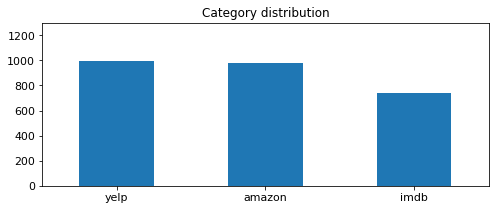

In [38]:
print(df.Category.value_counts())

df.Category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [43]:
#Tyring to use wordclouse rather than the bar chart since the bar chart was an example of the lab class.
from Wordcloud import WordCloud
cloud = WordCloud(width=400, height=400).generate(" ".join(df['Review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')


ModuleNotFoundError: No module named 'Wordcloud'

Text(0, 0.5, 'Number of Title')

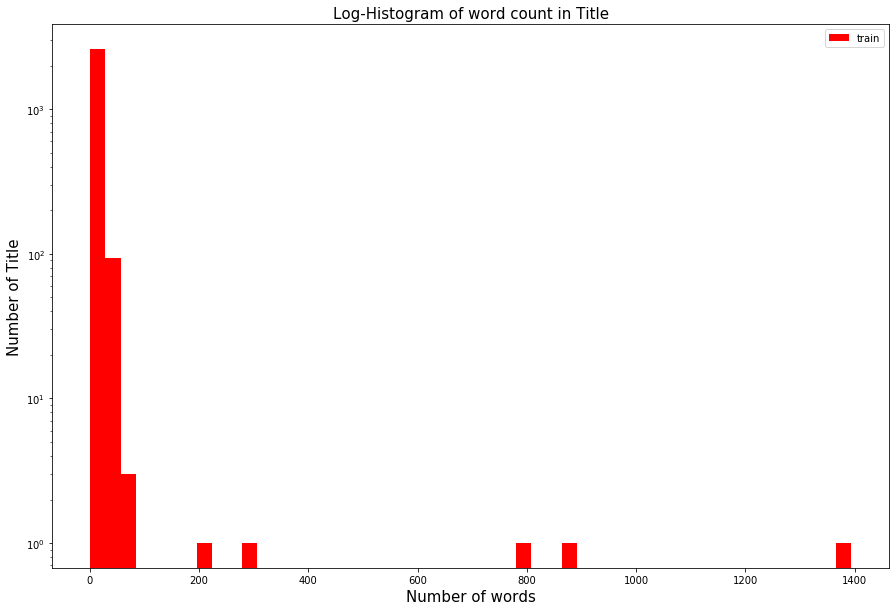

In [44]:
#number of words of each Review
df_word_counts = df['Review'].apply(lambda df:len(df.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(df_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in Title', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of Title', fontsize=15)

In [45]:
import nltk

In [46]:
df['unigrams'] = df['Review'].apply(lambda x: dmh.tokenize_text(x))

In [47]:
df[0:4]["unigrams"]

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
Name: unigrams, dtype: object

In [48]:
df[0:4]

,Review,Score,Category,unigrams
0,"A very, very, very slow-moving, aimless movie ...",0,imdb,"[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,Not sure who was more lost - the flat characte...,0,imdb,"[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,0,imdb,"[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of.,0,imdb,"[Very, little, music, or, anything, to, speak,..."


In [49]:
list(df[0:1]['unigrams'])

[['A',
  'very',
  ',',
  'very',
  ',',
  'very',
  'slow-moving',
  ',',
  'aimless',
  'movie',
  'about',
  'a',
  'distressed',
  ',',
  'drifting',
  'young',
  'man',
  '.']]

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.Review)

In [115]:
df_counts

<2714x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 30149 stored elements in Compressed Sparse Row format>

In [51]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [52]:
# We can check the shape of this matrix by:
df_counts.shape

(2714, 5153)

In [53]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [54]:
df[0:5]

,Review,Score,Category,unigrams
0,"A very, very, very slow-moving, aimless movie ...",0,imdb,"[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,Not sure who was more lost - the flat characte...,0,imdb,"[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,0,imdb,"[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of.,0,imdb,"[Very, little, music, or, anything, to, speak,..."
4,The best scene in the movie was when Gerardo i...,1,imdb,"[The, best, scene, in, the, movie, was, when, ..."


In [55]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [56]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [59]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [60]:
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [61]:
plot_z = df_counts[0:20, 0:20].toarray()

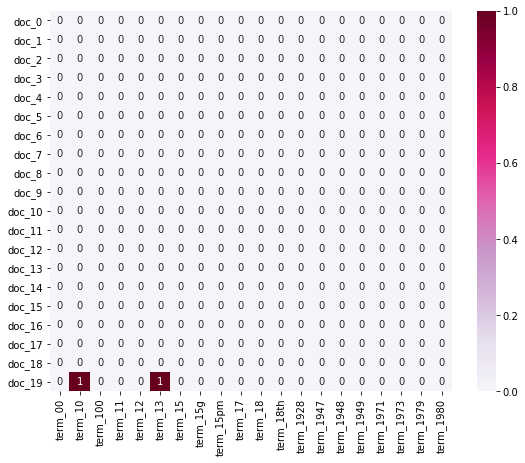

In [62]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [63]:
from sklearn.decomposition import PCA

In [64]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

In [65]:
df_reduced.shape

(2714, 2)

In [66]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
#df_counts = count_vect.fit_transform(df.Review)

In [67]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [68]:
term_frequencies[0]

1

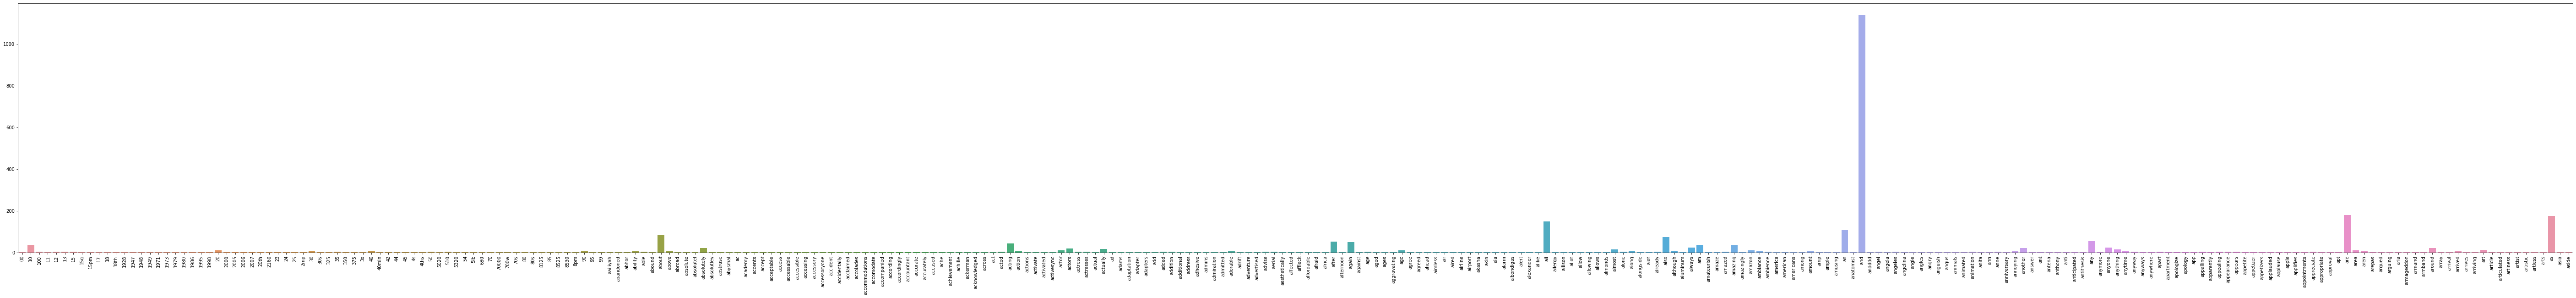

In [69]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [70]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]


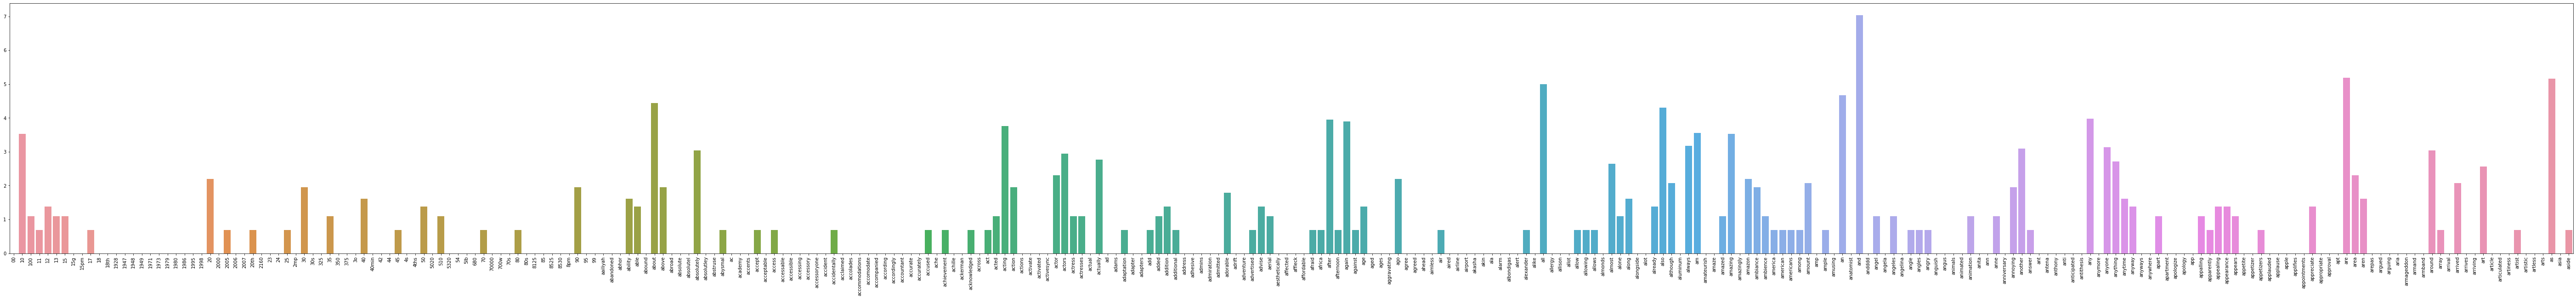

In [71]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [72]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [73]:
mlb = preprocessing.LabelBinarizer()

In [74]:
mlb.fit(df.Category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [75]:
mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [76]:
df['bin_category'] = mlb.transform(df['Category']).tolist()

In [77]:
df[0:9]

,Review,Score,Category,unigrams,bin_category
0,"A very, very, very slow-moving, aimless movie ...",0,imdb,"[A, very, ,, very, ,, very, slow-moving, ,, ai...","[0, 1, 0]"
1,Not sure who was more lost - the flat characte...,0,imdb,"[Not, sure, who, was, more, lost, -, the, flat...","[0, 1, 0]"
2,Attempting artiness with black & white and cle...,0,imdb,"[Attempting, artiness, with, black, &, white, ...","[0, 1, 0]"
3,Very little music or anything to speak of.,0,imdb,"[Very, little, music, or, anything, to, speak,...","[0, 1, 0]"
4,The best scene in the movie was when Gerardo i...,1,imdb,"[The, best, scene, in, the, movie, was, when, ...","[0, 1, 0]"
5,"The rest of the movie lacks art, charm, meanin...",0,imdb,"[The, rest, of, the, movie, lacks, art, ,, cha...","[0, 1, 0]"
6,Wasted two hours.,0,imdb,"[Wasted, two, hours, .]","[0, 1, 0]"
7,Saw the movie today and thought it was a good ...,1,imdb,"[Saw, the, movie, today, and, thought, it, was...","[0, 1, 0]"
8,A bit predictable.,0,imdb,"[A, bit, predictable, .]","[0, 1, 0]"


In [78]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['Review']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['Review']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['Review']
document_to_transform_3.append(random_record_3)

In [79]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['The movie was so boring, that I sometimes found myself occupied peaking in the paper instead of watching (never happened during a Columbo movie before!  ']
["I don't think I've ever gone to a movie and disliked it as much.  "]
['Everything about this movie is stupid.  ']


In [80]:
from sklearn.preprocessing import binarize

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [81]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.111111
Cosine Similarity using count bw 1 and 3: 0.157135
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers

on my process to try to apply 'Naive Bayes Classifier' to the process, I faced the difficulty at the final stage. 

However, I would like to explain what steps I went through

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB #Polynomial NBC Model
from sklearn.metrics import accuracy_score #Accuracy calculation

In [118]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_counts, df["Score"], test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)


0.8055964653902798

######################Below is what I just tried to do. You can ignore it!############

I thought I should make the bag of words from the df data, which is the dataframe without any of duplicated datas made out of the combined dataframe that the dataframe made with 3 csv resources.
To make an automatic BoW, I used Countvectorizer

In [83]:
dtmvector = CountVectorizer()
df_train_dtm = dtmvector.fit_transform(df["Review"])
print(df_train_dtm.shape)

(2714, 5153)


The DTM is now automatically completed. 2714 is the number of Review and, from a DTM perspective, the number of documents. 5153 means the number of words that appear in the entire  data.

Of course, you can still use DTM for the NBC, but you can also improve performance by entering a TF-IDF matrix with TF-IDF weights instead of the DTM matrix.  Attention is not always as high performance as the TF-IDF matrix was performed with DTM. We'll try this because we offer a TfidVector class that automatically calculates TF-IDF.

In [84]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(df_train_dtm)
print(df_train_dtm.shape)

(2714, 5153)


In [85]:
mod = MultinomialNB()
mod.fit(tfidfv, df["Review"])


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [112]:
mod.fit

<bound method BaseDiscreteNB.fit of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)>

In [86]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
#where alfa=1.0 means Laplace Smoothing applied.

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [87]:
df_test = df['Review'] #Fetching the data to be tested
df_test_dtm = dtmvector.transform(df["Review"]) #Converting the data to DTM
tfidfv_test = tfidf_transformer.transform(df_test_dtm) #DTM to TF-IDF converting
predicted = mod.predict(tfidfv_test) #Make a prediction about the data
print("Accuracy:", accuracy_score(df_test_dtm, predicted)) #Comparison the result to the predicted data

#It used to work, and it doesn't work anymore after I restart all the kernels again.WHYYYYYYYYYYY


TypeError: len() of unsized object

# Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).

I already did the tokenized process for 'unigrams' column, but tried to do it in other way.

In [88]:
from nltk.tokenize import sent_tokenize
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)

In [89]:
df.head()

,Review,Score,Category,unigrams,bin_category,tokenized_sents
0,"A very, very, very slow-moving, aimless movie ...",0,imdb,"[A, very, ,, very, ,, very, slow-moving, ,, ai...","[0, 1, 0]","[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,Not sure who was more lost - the flat characte...,0,imdb,"[Not, sure, who, was, more, lost, -, the, flat...","[0, 1, 0]","[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,0,imdb,"[Attempting, artiness, with, black, &, white, ...","[0, 1, 0]","[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of.,0,imdb,"[Very, little, music, or, anything, to, speak,...","[0, 1, 0]","[Very, little, music, or, anything, to, speak,..."
4,The best scene in the movie was when Gerardo i...,1,imdb,"[The, best, scene, in, the, movie, was, when, ...","[0, 1, 0]","[The, best, scene, in, the, movie, was, when, ..."


In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform((df['Review']).tolist())

In [131]:
#The output  will be a sparse matrix,  visualize it I do the toarray.
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
print(x.shape)

(2714, 5153)
